In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from dateutil import parser

In [2]:
dataset = pd.read_csv("appdata10.csv")

In [3]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Data Cleaning
dataset['hour'] = dataset.hour.str.slice(1,3).astype(int)
dataset

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,2013-05-09 13:46:17.871,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0


In [6]:
#Plotting
#Want to remove all categorical columns
dataset2 = dataset.copy().drop(columns = ['user','screen_list','enrolled_date','first_open','enrolled'])



In [7]:
dataset2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


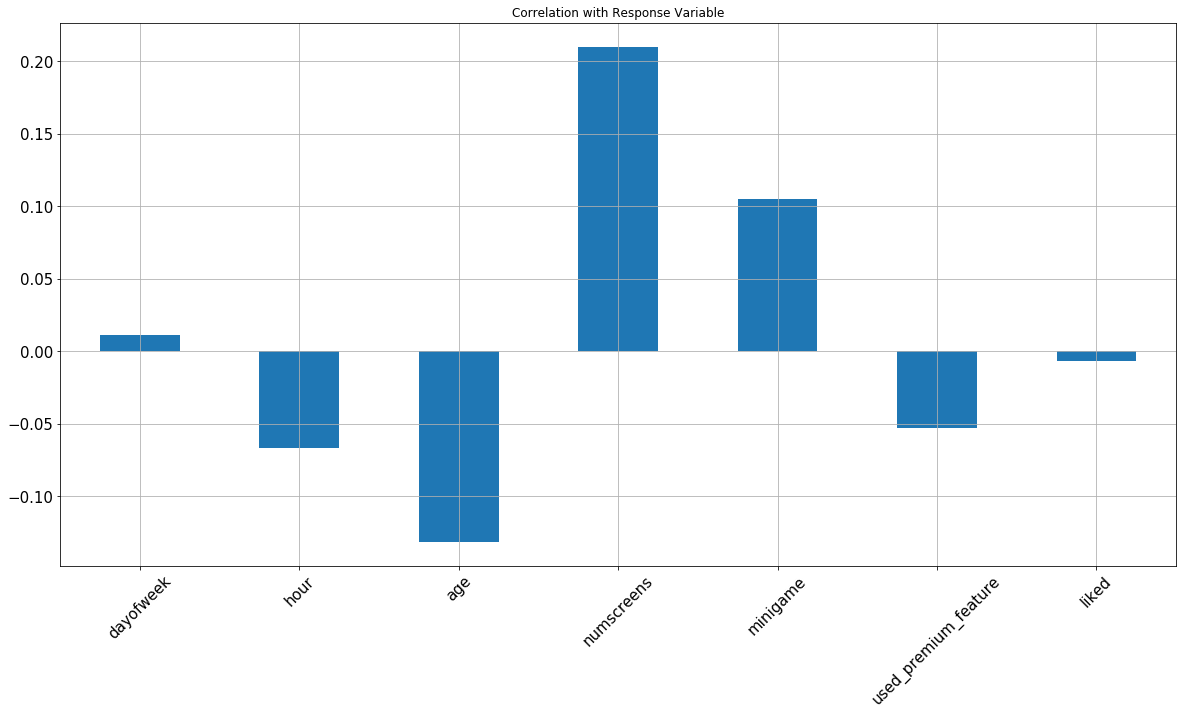

In [8]:
#Correlation Plot with Response Variable
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20,10),title = 'Correlation with Response Variable',fontsize = 15,rot = 45,grid = True)

In [9]:
#Correlation Matrix
sn.set(style = "white",font_scale = 2)

In [10]:
#Compute the correlation matrix
corr = dataset2.corr()

In [11]:
#Generate a mask for the upper triangle
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

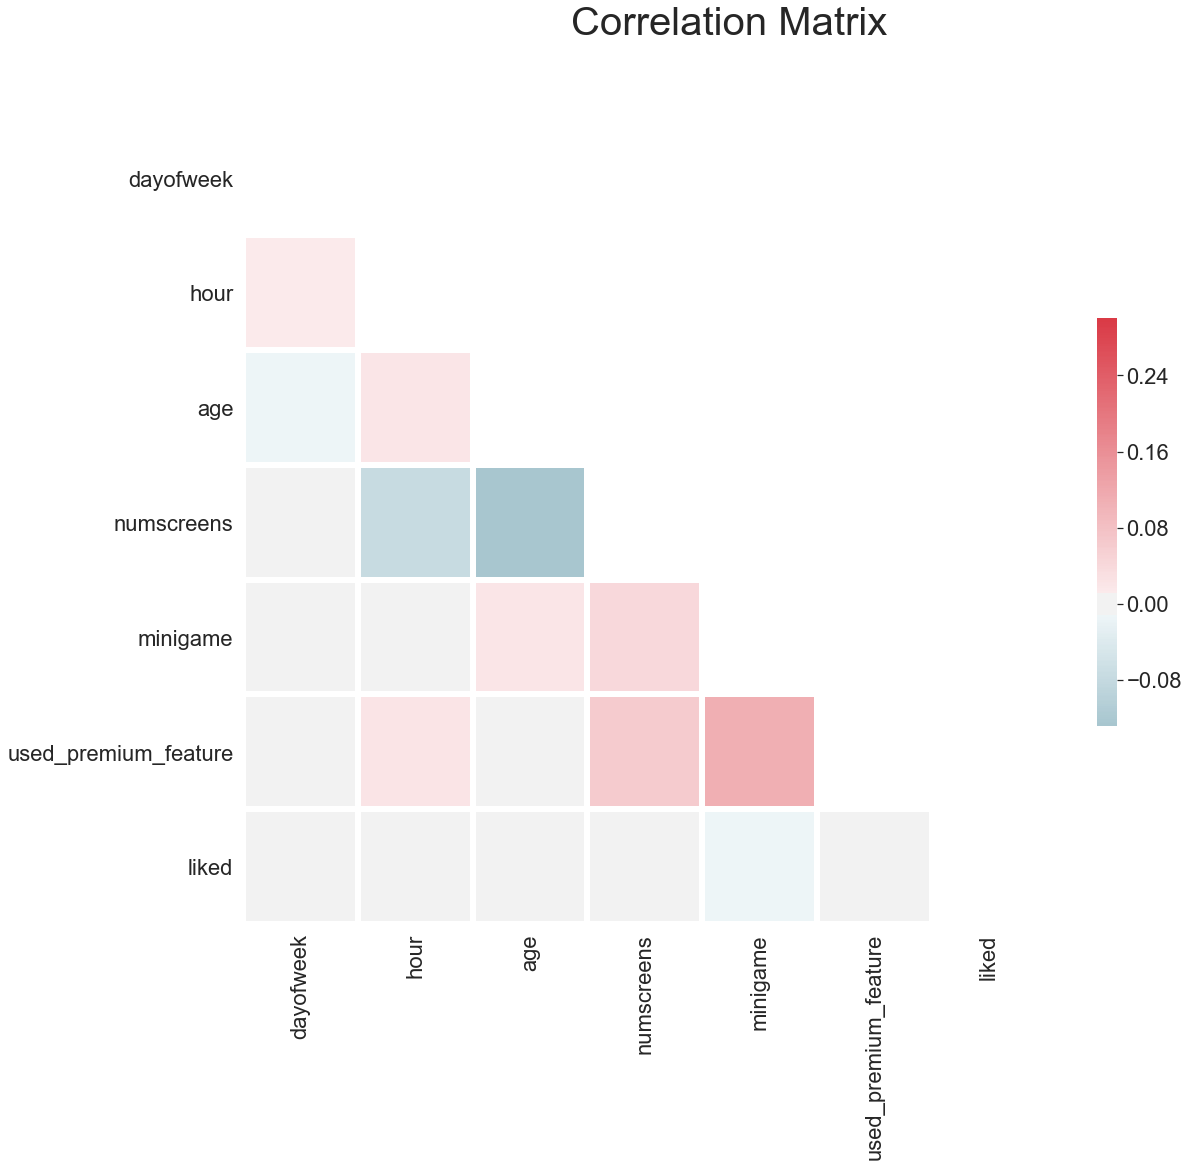

In [12]:
#Set up the matplotlib figure
f,ax = plt.subplots(figsize = (18,15))
f.suptitle("Correlation Matrix",fontsize = 40)
#Generate a custom diverging colormap
cmap = sn.diverging_palette(220,10,as_cmap = True)
#Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr,mask =mask,cmap = cmap,vmax =.3,center =0
           ,square = True, linewidths = 5, cbar_kws={"shrink": .5})

In [13]:
#Feature Engineering
dataset.dtypes
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]


In [14]:
#Conversion to Datetime Option
dataset.first_open

0       2012-12-27 02:14:51.273
1       2012-12-02 01:16:00.905
2       2013-03-19 19:19:09.157
3       2013-07-05 16:08:46.354
4       2013-02-26 18:50:48.661
                  ...          
49995   2013-05-09 13:46:17.871
49996   2013-04-09 00:05:17.823
49997   2013-02-20 22:41:51.165
49998   2013-04-28 12:33:04.288
49999   2012-12-14 01:22:44.638
Name: first_open, Length: 50000, dtype: datetime64[ns]

In [15]:
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

In [16]:
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

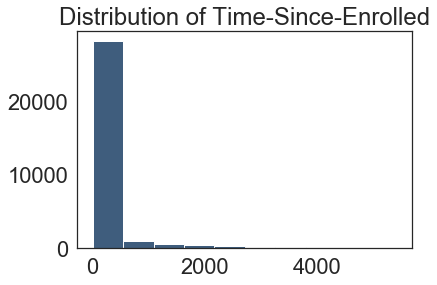

In [17]:
plt.hist(dataset["difference"].dropna(),color = "#3F5D7D")
plt.title("Distribution of Time-Since-Enrolled")
plt.show()

#We see in distribution plot that majority people enroll
#in the first 500 hours but as there is such a right-tailed 
#distribution most enrolments may have taken in the first 100 hours

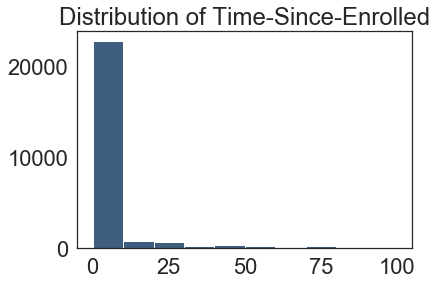

In [18]:
#Check first 100 hours
dataset = pd.read_csv("appdata10.csv")
#Feature Engineering
dataset.dtypes
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

plt.hist(dataset["difference"].dropna(),color = "#3F5D7D",range = [0,100])
plt.title("Distribution of Time-Since-Enrolled")
plt.show()

In [19]:
#Everything almost happens in the first 10-15 hours
#To include majority of people include those people who responded in the first 48 hours
#Every person above 48 hours cut-off mark is listed as not enrolled
dataset.loc[dataset.difference > 48,'enrolled'] = 0

In [20]:
#Remove all columns which are not needed
dataset = dataset.drop(columns = ['difference','enrolled_date','first_open'])

In [21]:
#Further Feature Engineering
#Formatting Screen_List
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [22]:
#Map each screen by separating them into their own list
dataset["screen_list"] = dataset.screen_list.astype(str) + ','



In [23]:
for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")
    

In [24]:
#Screens which are not top screens
dataset["Other"] = dataset.screen_list.str.count(",")

In [25]:
#Funnels
#Funnels are a group of screens that belong to the same set
#There are many screens that are correlated with each other
#We do not want correlations as this will affect the model
#In order to remove correlation and keep value of screens
#Groups screens into one funnel
#If they belong to one funnel then it becomes one columns of 
#how many screens contained in one funnel
savings_screens = ["Saving1",
                   "Saving2",
                   "Saving2Amount",
                   "Saving4",
                   "Saving5",
                   "Saving6",
                   "Saving7",
                   "Saving8",
                  "Saving9",
                   "Saving10"]
dataset["SavingsCount"] = dataset[savings_screens].sum(axis =1)
dataset = dataset.drop(columns = savings_screens)

In [26]:
cm_screens = ["Credit1","Credit2","Credit3","Credit3Container","Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis =1)
dataset = dataset.drop(columns = cm_screens)

In [27]:
cc_screens = ["CC1","CC1Category","CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis =1)
dataset = dataset.drop(columns = cc_screens)

In [28]:
loan_screens = ["Loan","Loan2","Loan3","Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis =1)
dataset = dataset.drop(columns = loan_screens)

In [29]:
#Check results
dataset.head()
#Create new dataset after Feature Engineering
dataset.to_csv("new_appdata10.csv",index = False)

In [30]:
#Dataa Preprocessing
#Split response variable from independent features

response = dataset["enrolled"]
dataset = dataset.drop(columns = "enrolled")

dayofweek                   int64
hour                       object
age                         int64
screen_list                object
numscreens                  int64
minigame                    int64
used_premium_feature        int64
liked                       int64
location                    int64
Institutions                int64
VerifyPhone                 int64
BankVerification            int64
VerifyDateOfBirth           int64
ProfilePage                 int64
VerifyCountry               int64
Cycle                       int64
idscreen                    int64
Splash                      int64
RewardsContainer            int64
EditProfile                 int64
Finances                    int64
Alerts                      int64
Leaderboard                 int64
VerifyMobile                int64
VerifyHousing               int64
RewardDetail                int64
VerifyHousingAmount         int64
ProfileMaritalStatus        int64
ProfileChildren             int64
ProfileEducati

In [38]:
#Split data into training and test set
from sklearn.model_selection import train_test_split
#Want to identify user with prediction
#Therefore separate user
X_train,X_test,y_train,y_test = train_test_split(dataset,response,test_size =0.2,random_state = 0)
train_identifier = X_train['user']
X_train = X_train.drop(columns = ['user','screen_list'])
test_identifier = X_test['user']
X_test = X_test.drop(columns = ['user','screen_list'])



In [39]:
X_train['hour'] = X_train.hour.str.slice(1,3).astype(int)
X_test['hour'] = X_test.hour.str.slice(1,3).astype(int)


In [40]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
20330,2,20,32,5,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,2
17532,1,21,22,42,1,0,0,1,1,1,...,0,0,0,0,0,13,0,1,0,1
45819,0,4,26,85,1,0,0,0,1,0,...,0,0,0,0,0,10,0,2,1,2
34807,4,13,25,24,1,0,0,1,0,0,...,0,0,0,0,0,10,0,0,0,1
31888,3,16,50,11,0,0,0,1,0,1,...,0,0,0,0,0,3,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,23,19,6,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
45891,0,15,22,4,1,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
42613,3,6,25,43,0,0,0,0,1,0,...,0,0,0,0,0,4,6,0,0,0
43567,4,13,27,4,1,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [41]:
#Feature Scaling
#converted training and test sets to be scaled
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scaled = pd.DataFrame(sc_X.fit_transform(X_train))
X_test_scaled = pd.DataFrame(sc_X.transform(X_test))
#Maintain Column Names
#Maintain Index to identify user
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train[X_train.columns.values] = X_train_scaled.values
X_test[X_test.columns.values] = X_test_scaled.values

In [42]:
#Model Building
from sklearn.linear_model import LogisticRegression
#L1 penalty penalises any particular field that is strongly correlated to response variable
classifier = LogisticRegression(random_state = 0,penalty = 'l1')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [43]:
#Evaluate accuracy of predictions
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.7681

In [44]:
precision_score(y_test,y_pred)


0.7618952017667135

In [45]:
recall_score(y_test,y_pred)


0.7700892857142857

In [46]:
f1_score(y_test,y_pred)

0.7659703300030276

Test Data Accuracy: 0.7681


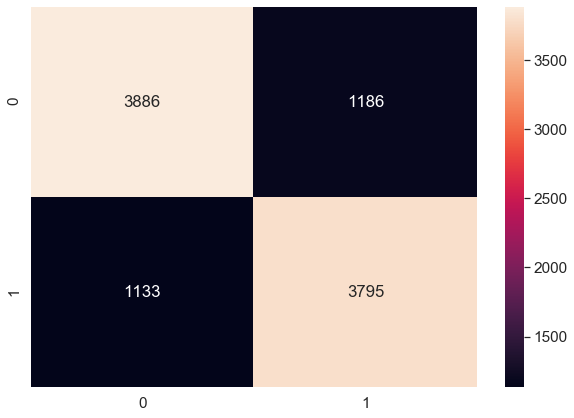

In [47]:
df_cm = pd.DataFrame(cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sn.set(font_scale = 1.4)
sn.heatmap(df_cm,annot =True, fmt = 'g')
print("Test Data Accuracy: %0.4f" %accuracy_score(y_test,y_pred))

In [48]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,y=  y_train,cv = 10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(),accuracies.std()*2))

/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/danishnaseem/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: 

Logistic Accuracy: 0.767 (+/- 0.009)


In [49]:
#Formatting the Final Results
final_results = pd.concat([y_test,test_identifier],axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results[['user','enrolled','predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
